# Solution Assignment 1: Backpropagation and Gradient Descent

This is the solution of the first assignment of the Implementing Artificial Neural Networks with TensorFlow course. Please find the according assignment sheet on studip.

## 1. The backpropagation algorithm

### 1.1 Write down the network function

$y = \sigma(\sigma(\sigma(\bar{x}^TW)W)\bar{w})$

### 1.2 Insert the network-function into the _Sum Squared Error Function_

The _Sum Squared Error Function_ is defined as, $loss = \sum_j\frac{1}{2}(\hat{y_j}-y_j)^2$. Where $y$ denotes the network's output, $\bar{x_j}$ the network input and $\hat{y}$ the label (target value) of $\bar{x_j}$. Hence, we get the following formula, if we insert the network-function into the _Sum Squared Error Function_:

$loss = \sum_j\frac{1}{2}(\hat{y_j}-\sigma(\sigma(\sigma(\bar{x_j}^TW)W)\bar{w}))^2$


### 1.3 Calculate the gradient of the loss function with respect to $\bar{w}_{out}$

$
\begin{align}
\nabla_{\bar{w_3}} loss &= \nabla_{\bar{w_3}} \sum_j\frac{1}{2}(\hat{y_j}-y_j)^2\\
&= \sum_j \nabla_{\bar{w_3}}\frac{1}{2}(\hat{y}-y)^2\\
&= \sum_j (\hat{y_j}-y_j) \nabla_{\bar{w_3}}\hat{y}-y\\
&= \sum_j (\hat{y_j}-y_j) \nabla_{\bar{w_3}}-\sigma(\bar{a_2}\bar{w_3})\\
&= \sum_j (\hat{y_j}-y_j) (-\sigma'(\bar{a_2}\bar{w_3})) \nabla_{\bar{w_3}} \bar{a_2}\bar{w_3}\\
&= \sum_j (\hat{y_j}-y_j) (-\sigma'(\bar{a_2}\bar{w_3})) \bar{a_2}\\
\end{align}
$

### 1.4 The derivative of the Logistic Function

The _quotient rule_ of calculus states, that the derivative of a function, which is defined as the ratio of two functions $f(x) = \frac{g(x)}{h(x)}$ is defined as $f'(x) = \frac{g'(x)h(x)-g(x)h'(x)}{h(x)^2}$.

The Logistic Function $\sigma(x) = \frac{1}{1+e^{-x}}$ is exactly of this form and hence, we can derive

$
\begin{align}
\sigma'(x) &= \frac{\delta}{\delta x} \frac{1}{1+e^{-x}}\\
&= \frac{(0\cdot e^{-x})-(1\cdot -e^{-x})}{(1+e^{-x})^2}\\
&= \frac{e^{-x}}{(1+e^{-x})^2}
\end{align}
$

Another notation that you can find quite frequently is $\sigma'(x) = \sigma(x)(1 - \sigma(x))$. It can be derived in the following way:

$
\begin{align}
\sigma'(x) &= \frac{\delta}{\delta x} \frac{1}{1+e^{-x}} \frac{e^x}{e^x}\\
&= \frac{\delta}{\delta x} \frac{e^x}{e^x+e^0}\\
&= \frac{\delta}{\delta x} \frac{e^x}{1+e^x}\\
&= \frac{e^x(1+e^x)-e^xe^x}{(1+e^x)^2}\\
&= \frac{e^x+e^{2x}-e^{2x}}{(1+e^x)^2}\\
&= \frac{e^x}{(1+e^x)^2}\\
&= \frac{e^x}{1+e^x}\frac{1}{1+e^x}\\
&= \sigma(x)(1-\sigma(x))
\end{align}
$

since

$
\begin{align}
(1-\sigma(x)) &= 1-\frac{e^x}{1+e^{x}}\\
&= \frac{1+e^x}{1+e^x}-\frac{e^x}{1+e^{x}}\\
&= \frac{1}{1+e^x}
\end{align}
$





## 2. Cats and Dogs
Next, we are going to implement the very simple network, with only two input values, two weights and a single output neuron and visualize the error surface and the training progress.

![IMAGE MISSING](./simple-ann.png)

### 2.1 Imports
We are going to use `numpy` for the numerical computations and `matplotlib` to plot the training process of the network. Further, we activate inline plotting by calling `%matplotlib notebook`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

%matplotlib notebook

### 2.2 Training data
First, lets generate our training data. We sample both, the cat and the dog data from a 2-D normal distribution.

In [3]:
sample_size = 30

np.random.seed(1)
cats = np.random.normal(25, 5, (2, sample_size))
dogs = np.random.normal(45, 15, (2, sample_size))

### 2.3 Investigating the data

<IPython.core.display.Javascript object>


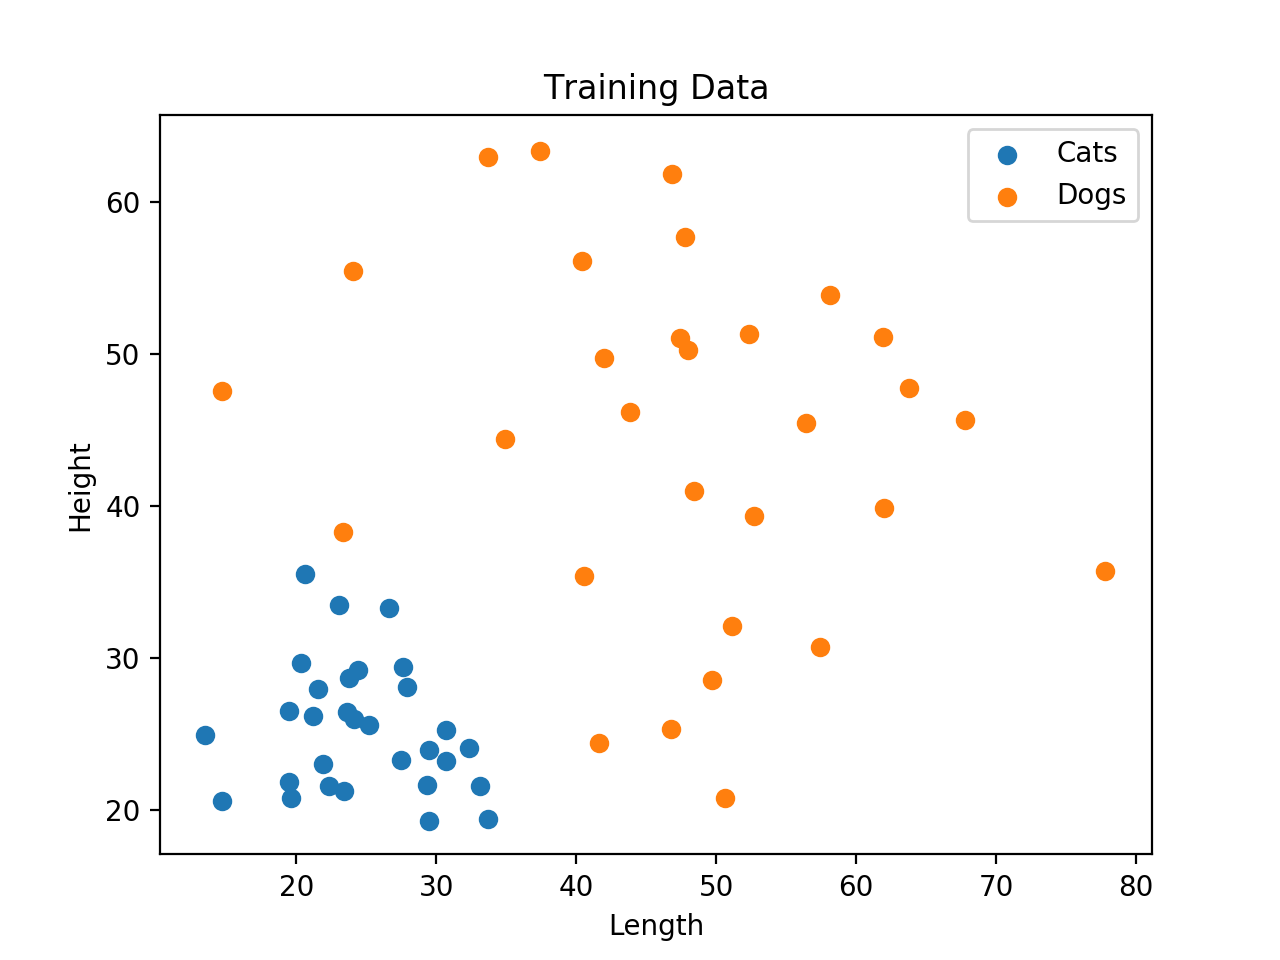

In [4]:
fig, ax = plt.subplots()

ax.scatter(cats[0], cats[1], label = "Cats")
ax.scatter(dogs[0], dogs[1], label = "Dogs")

ax.set_title("Training Data")
ax.set_xlabel("Length")
ax.set_ylabel("Height")

ax.legend()